In [2]:
import numpy as np
from matplotlib import pyplot as plt

from metropolis import metropolis_hastings, metropolis_gibbs
from utils import *

%load_ext autoreload
%autoreload 2

# Performance of Metropolis-Hastings and Gibbs sampling methods for generating $\mu,\phi\,|\,X$
The source code for the algorithm can be found [here](https://github.com/jeonghlee12/STAT5114/tree/main/MCMC).

Data was generated with $x_i\sim N(\mu,\phi)$ where $\mu=200$ and precision $\phi=\frac{1}{2}$, with $N=10,30,100$.

Initialization was at $\mu_0=0$, $\phi_0=5$.

In [3]:
np.random.seed(1)

# True parameters
true_mu = 200
true_phi = 0.5

# Number of data in underlying sample
Ns = [10, 30, 100]

# Save results
results = dict()

for N in Ns:
    print("N =", N)

    # Generate simulation data
    data = np.random.normal(true_mu, np.sqrt(1 / true_phi), N)

    # Number of sampling (including burn-in)
    T = 50000

    ########################################################
    ###   Metropolis-Hastings sampling
    ########################################################
    print("Running Metropolis")
    # Define hyperparameters for proposal distribution
    mu_proposal_std = 1
    phi_proposal_std = 0.1

    # Define initial state (mu_0, sigma_0)
    initial_state = [0, 5]

    # Run vanilla metropolis hastings
    vanilla_results, vanilla_accept_prob = metropolis_hastings((mu_proposal_std, phi_proposal_std), initial_state, T, data)

    ########################################################
    ###   Gibbs sampling
    ########################################################
    print("Running Gibbs")
    # Define initial state (mu_0, sigma_0)
    initial_state = [0, 5]

    # Define hyperparameters for proposal distribution
    mu_proposal_std = 0.5
    phi_proposal_std = 0.1

    # Run Gibbs sampling
    gibbs_results, gibbs_accept_prob = metropolis_gibbs((mu_proposal_std, phi_proposal_std), initial_state, T, data)

    results[N] = dict()
    results[N]["vanilla"] = {"samples": vanilla_results,
                             "accept_prob": vanilla_accept_prob}
    results[N]["gibbs"] = {"samples": gibbs_results,
                             "accept_prob": gibbs_accept_prob}
    
    print("----------------------")

N = 10
Running Metropolis
Running Gibbs
----------------------
N = 30
Running Metropolis
Running Gibbs
----------------------
N = 100
Running Metropolis
Running Gibbs
----------------------


We report the trace plots, burn-in period, the histogram of marginal posteriors post burn-in, and then the contour plot of the joint samples from the samples of $\mu,\phi\,|\,X$.

We identify the burn-in period via visually inspecting the trace plots for the point of convergence.

## $N=10$

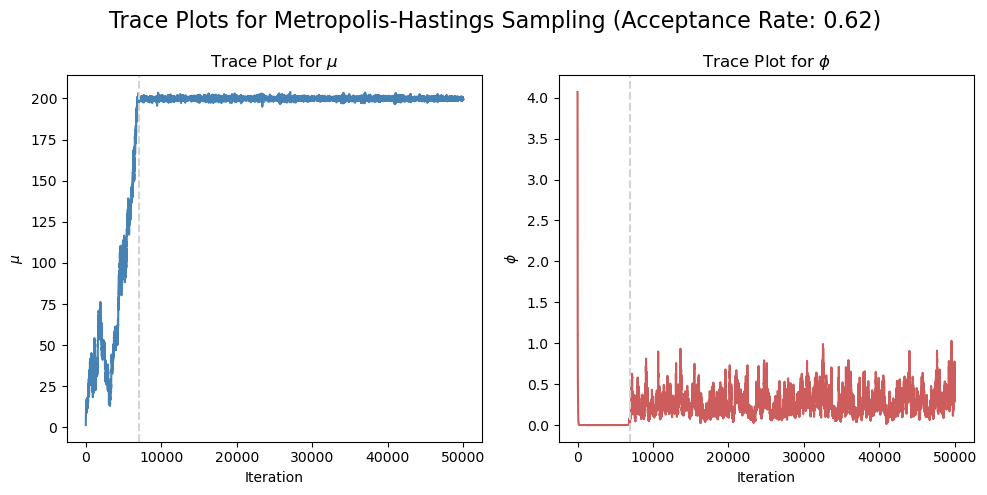

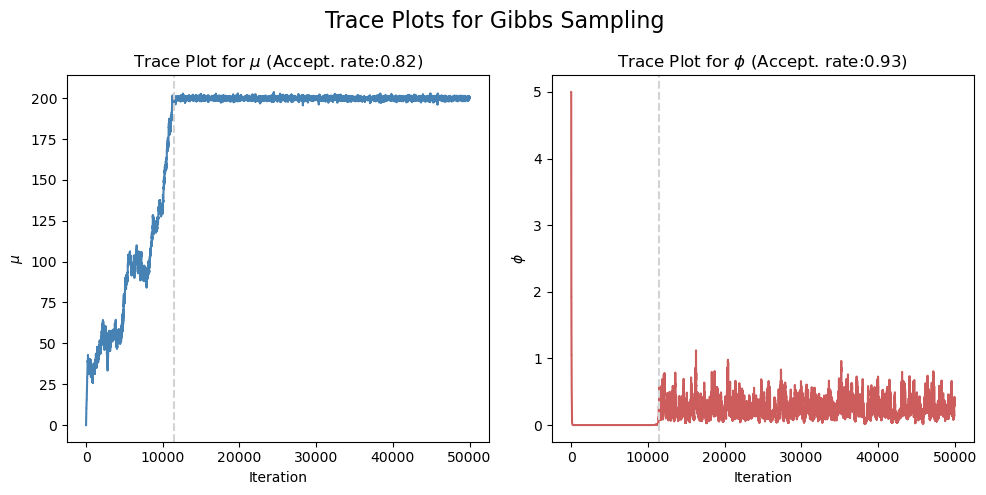

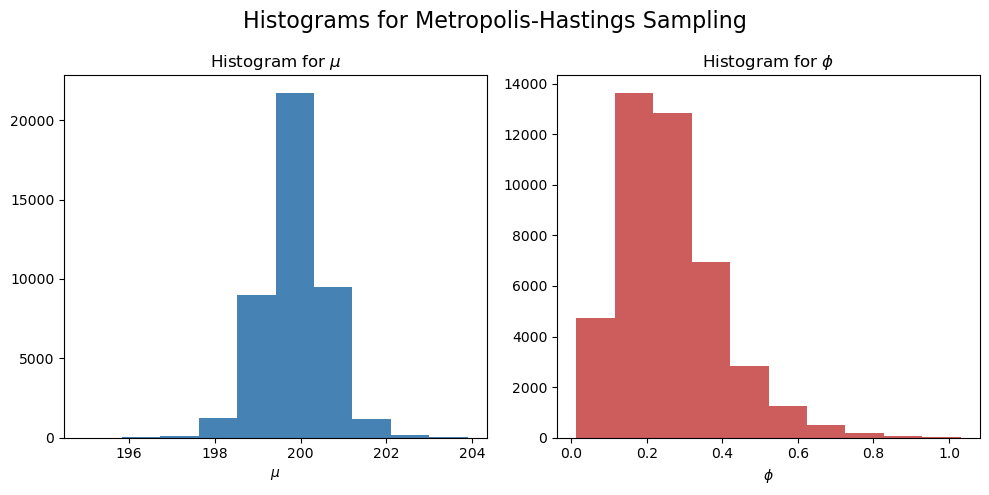

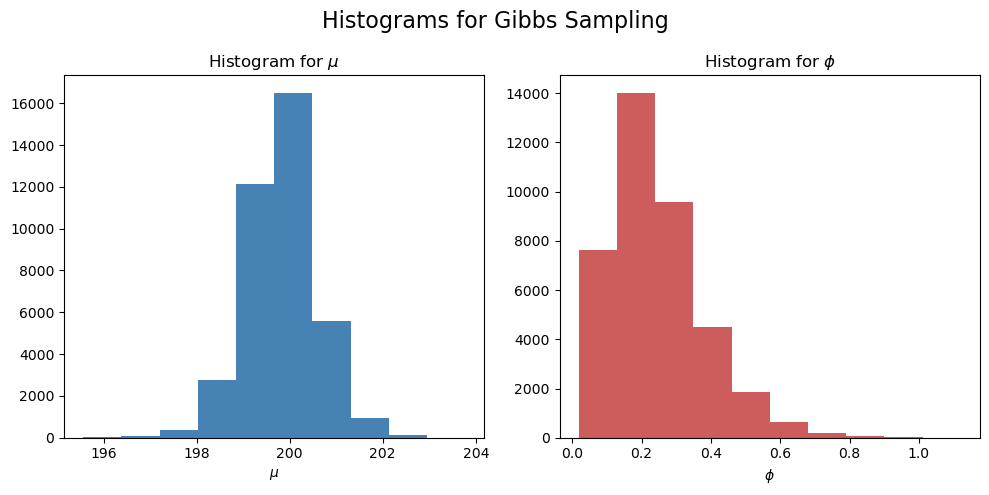

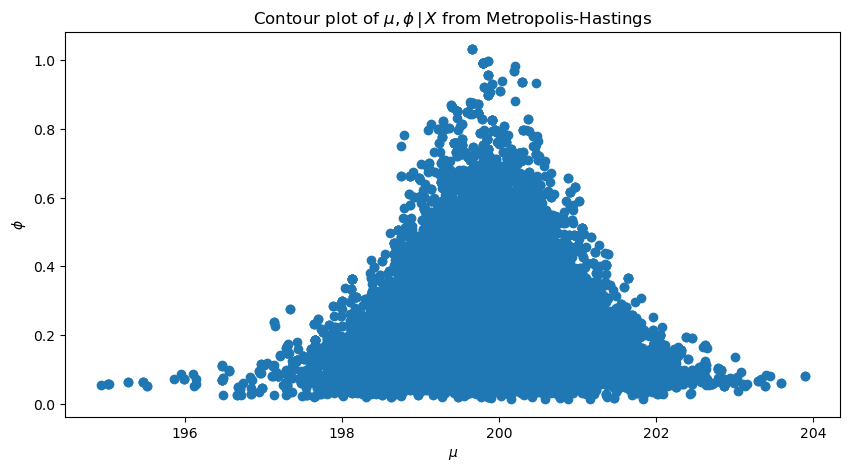

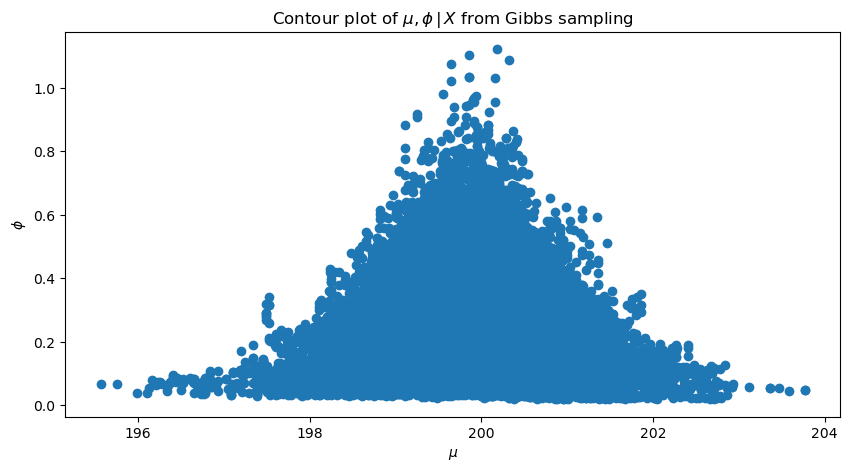

In [7]:
N = 10
vanilla_burn_T = 7000
gibbs_burn_T = 11500

plot_vanilla(results[N], vanilla_burn_T)
plot_gibbs(results[N], gibbs_burn_T)
hist_results(results[N], vanilla_burn_T, True)
hist_results(results[N], gibbs_burn_T, False)
contour(results[N], vanilla_burn_T, True)
contour(results[N], gibbs_burn_T, False)

## N = 30

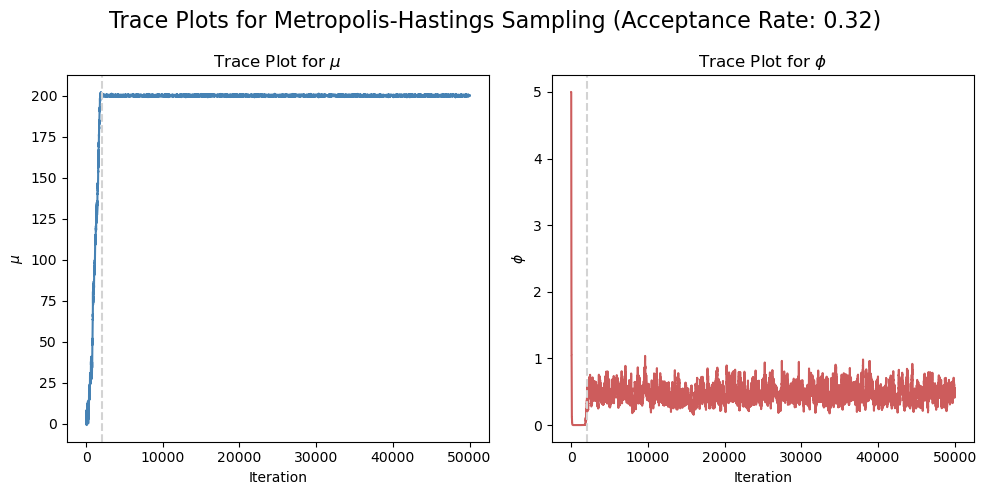

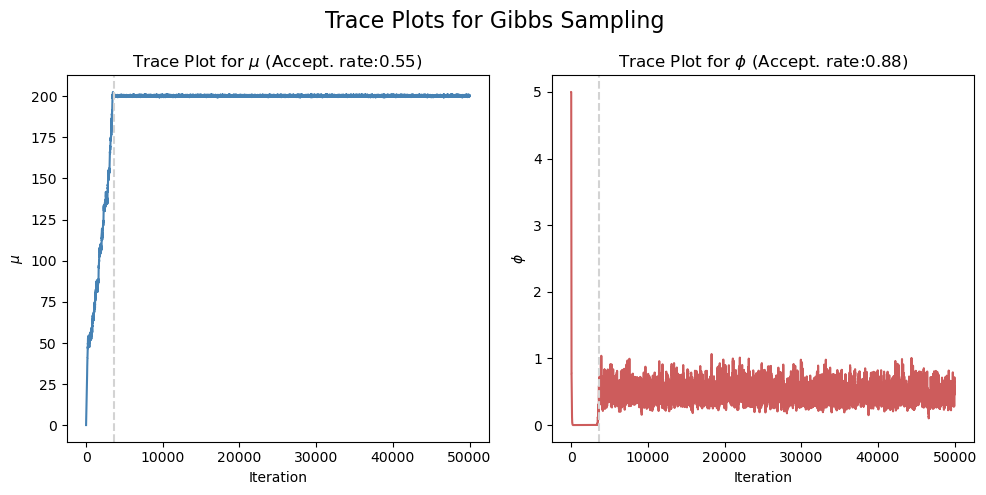

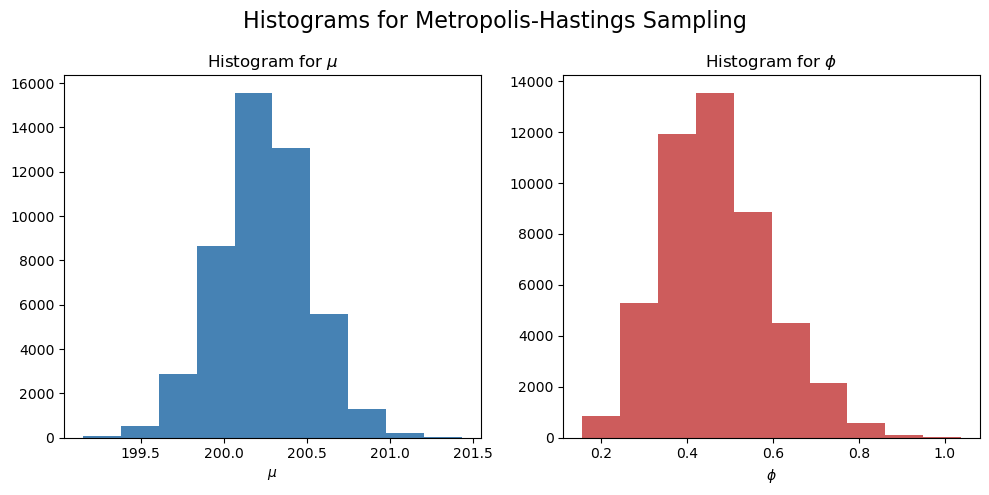

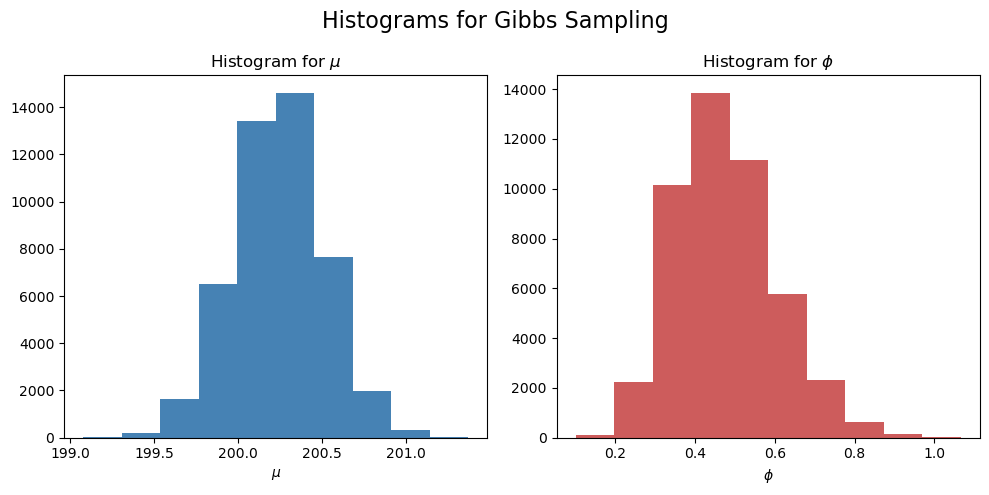

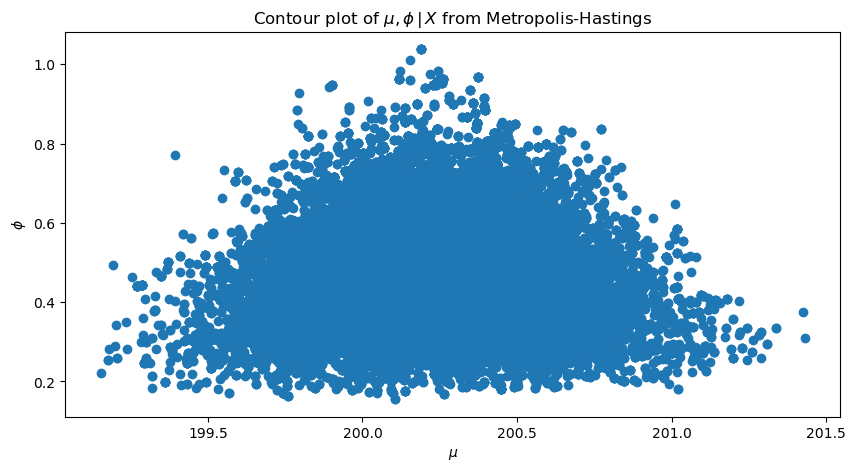

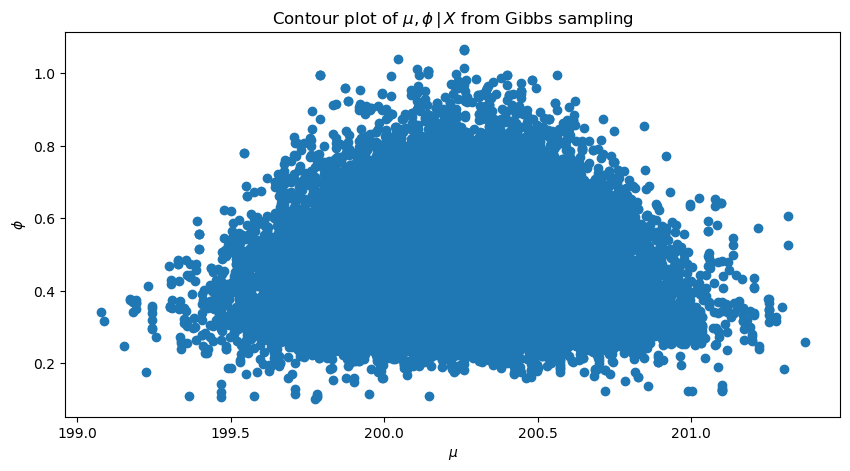

In [19]:
N = 30
vanilla_burn_T = 2100
gibbs_burn_T = 3600

plot_vanilla(results[N], vanilla_burn_T)
plot_gibbs(results[N], gibbs_burn_T)
hist_results(results[N], vanilla_burn_T, True)
hist_results(results[N], gibbs_burn_T, False)
contour(results[N], vanilla_burn_T, True)
contour(results[N], gibbs_burn_T, False)

## $N = 100$

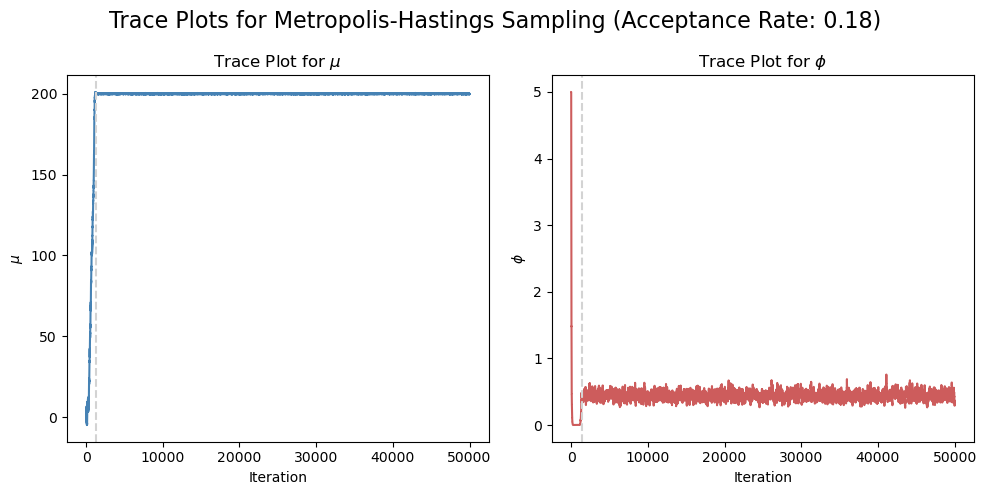

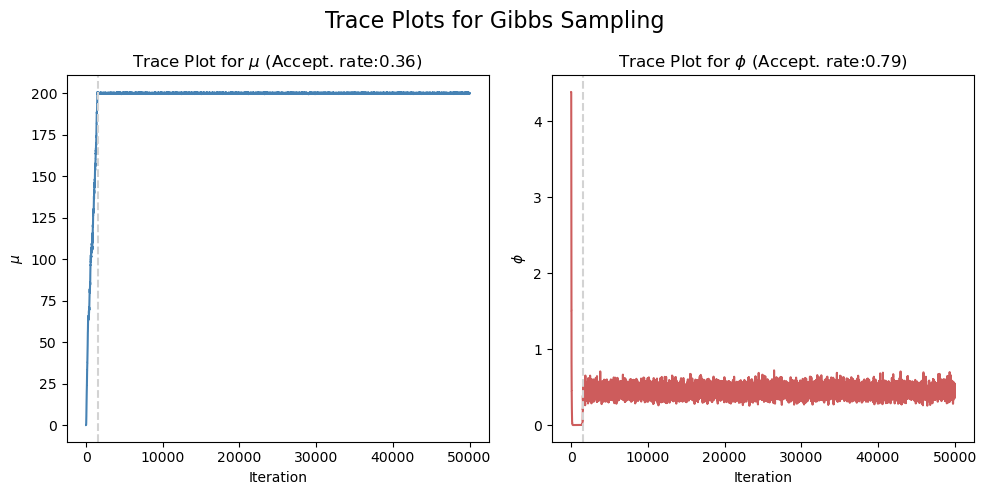

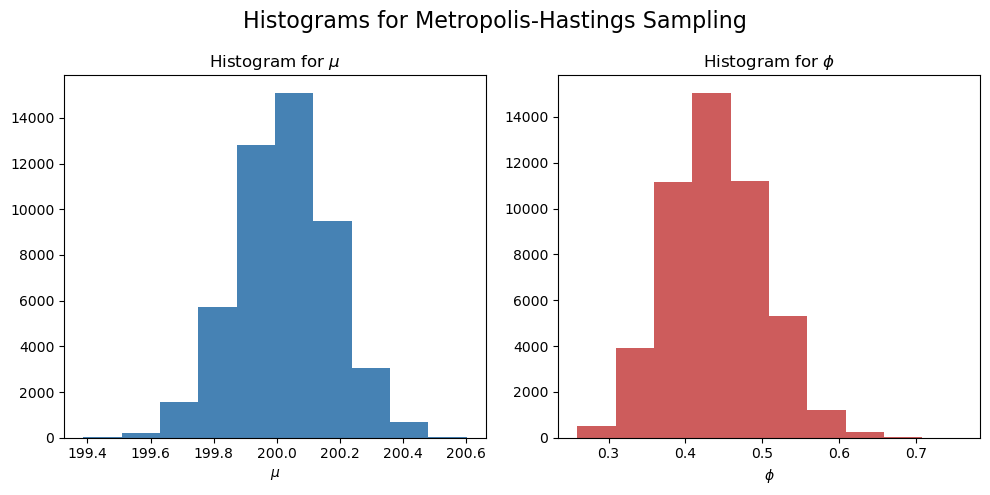

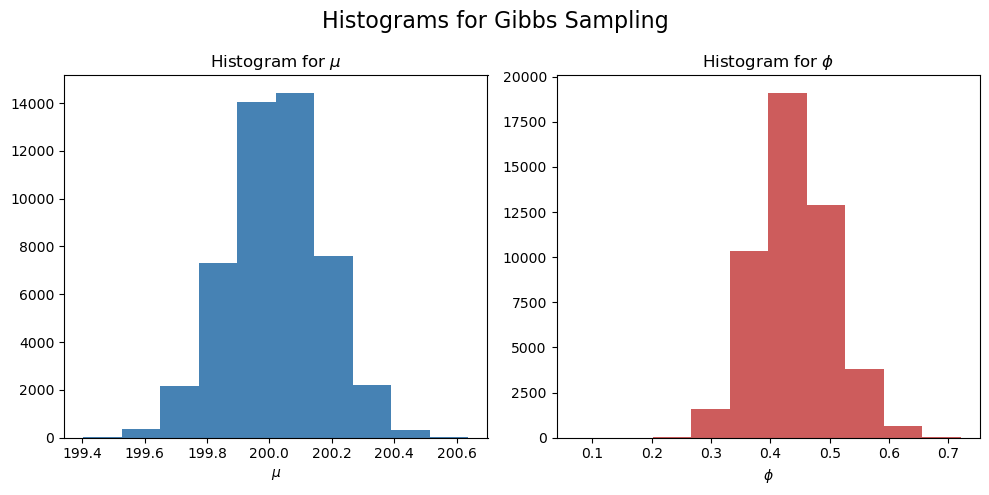

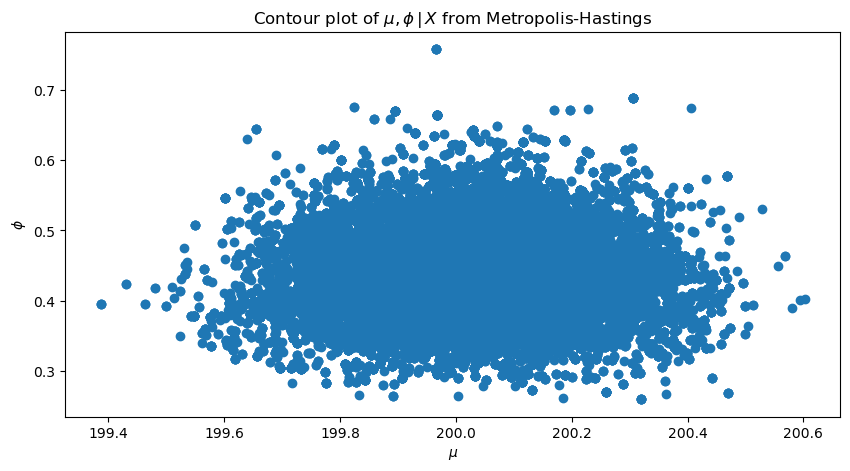

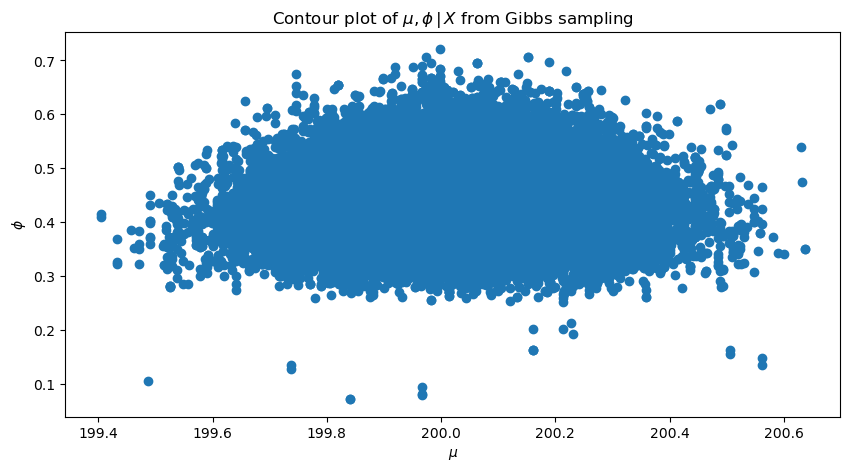

In [24]:
N = 100
vanilla_burn_T = 1350
gibbs_burn_T = 1500

plot_vanilla(results[N], vanilla_burn_T)
plot_gibbs(results[N], gibbs_burn_T)
hist_results(results[N], vanilla_burn_T, True)
hist_results(results[N], gibbs_burn_T, False)
contour(results[N], vanilla_burn_T, True)
contour(results[N], gibbs_burn_T, False)

In [29]:
import pandas as pd

## Code to save data
for N in Ns:
    df = pd.DataFrame(results[N]["vanilla"]["samples"], columns = ["mu", "phi"])
    df.to_csv("./simulation_data/n_" + str(N) + "_vanilla.csv", index=False)

    df = pd.DataFrame(results[N]["gibbs"]["samples"], columns = ["mu", "phi"])
    df.to_csv("./simulation_data/n_" + str(N) + "_gibbs.csv", index=False)